##### Metrics for Classification Sticth Fabric Detection
- Accuracy (Most Important)
- F1 Score 
- Precision
- Recall
- Time Complexity (Important)
- ROC AUC (Optional)
- Kappa (Optional)
- MCC (Optional)

### Calculation Metrics

- **Confusion Matrix**: Defined as TP (True Positive), FP (False Positive), FN (False Negative), TN (True Negative)

- **Accuracy**: `(TP + TN) / (TP + TN + FN + FP)`

- **Error Rate**: `(FP + FN) / (TP + TN + FN + FP)`

- **Sensitivity (Recall)**: `TP / (TP + FN)`

- **Specificity**: `TN / (TN + FP)`

- **Balanced Accuracy**: `(Sensitivity + Specificity) / 2`

- **Precision**: `TP / (TP + FP)`

- **F1-Score**: `2 * (Precision * Recall) / (Precision + Recall)`

- **Macro**: A type of averaging method for multiclass classification

- **Weighted**: A type of averaging method that takes class imbalance into account

- **ROC AUC**: Area Under the Receiver Operating Characteristic Curve

- **PR AUC**: Area Under the Precision-Recall Curve

### Prepare The Required Libraries And The Image

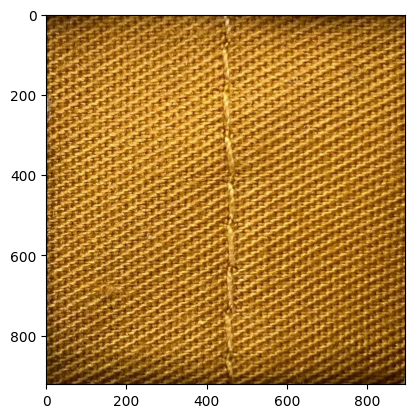

In [635]:
import cv2 												# OpenCV (Requirement For Image Processing)
import numpy as np									# Numpy (Requirement For Special Math Operations Like Matrix Multiplication)
import matplotlib.pyplot as plt					# Matplotlib (Requirement For Plotting Graphs Or Evaluate The Result)

path = 'validation/1.jpg' 		# Path to the image

image = cv2.imread(path)							# Load the image based on the path

if image is None:
    print("Failed to load image")   
else:
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)			# Convert the image to RGB (OpenCV uses BGR)

	plt.imshow(image)									# Display the image

### Change The Image Color Into GrayScale To Reduce The Complexity

The resolution of the image is 896x922 pixels.


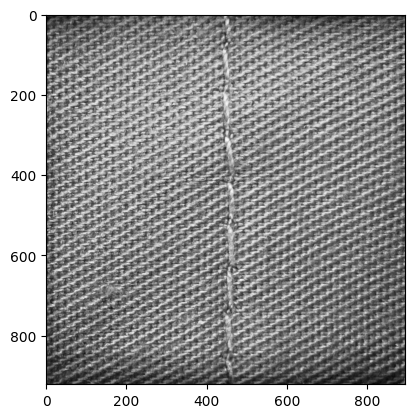

In [636]:
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)          # Load image in grayscale

if image is None:
    print("Failed to load image")   
else:
    height, width = image.shape[:2] # Get the image resolution (height, width) In Pixels
    print(f'The resolution of the image is {width}x{height} pixels.')
    plt.imshow(image, cmap='gray')  # Display the image in grayscale cmap is use because matplotlib uses RGB and OpenCV uses BGR

In [637]:
# # Crop The Image With OpenCV
# image = image[900:1900, 1250:2250]

# plt.imshow(image, cmap='gray')

### Resize The Image To Make Sure The Program Can Handle Better From The Image

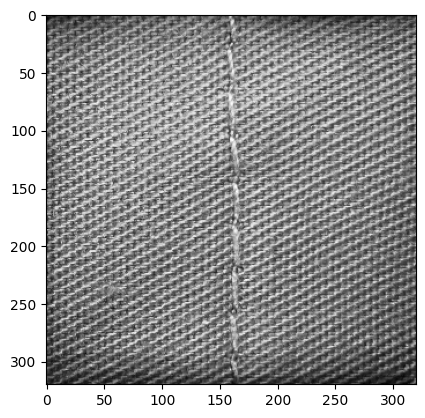

In [638]:
# Resize the image into 320x320 pixels
image = cv2.resize(image, (320, 320))

# Display the resized image
plt.imshow(image, cmap='gray')

In [639]:
# # Crop The Image With OpenCV
# image = image[0:320, 145:160]

# # Display the cropped image
# plt.imshow(image, cmap='gray')

### Blur The Image To Make Sure Detection Dont Detect The Noise In The Image <br>(In This Case Its Fabric)

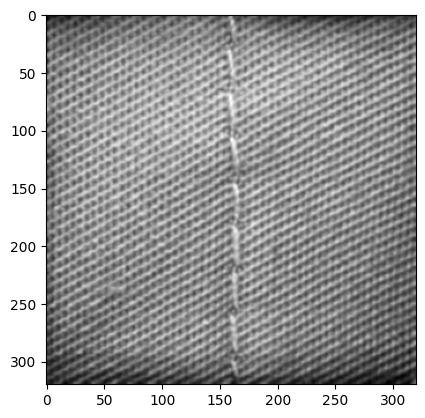

In [640]:
image = cv2.GaussianBlur(image, (5, 5), sigmaX=0, sigmaY=0) # Apply Gaussian Blur to the image with a kernel size of 5x5 and sigma of 0

# Display the image after applying Gaussian Blur
plt.imshow(image, cmap='gray')

In [641]:
# # Apply GaussianBlur To Only 0-150 x cordinate and 200-320 x cordinate
# image[:, 0:150] = cv2.GaussianBlur(image[:, 0:150], (5, 5), 2)
# image[:, 160:320] = cv2.GaussianBlur(image[:, 160:320], (5, 5), 2)

# plt.imshow(image, cmap='gray') # Display the image after applying Gaussian Blur

### Extract The Features From The Image

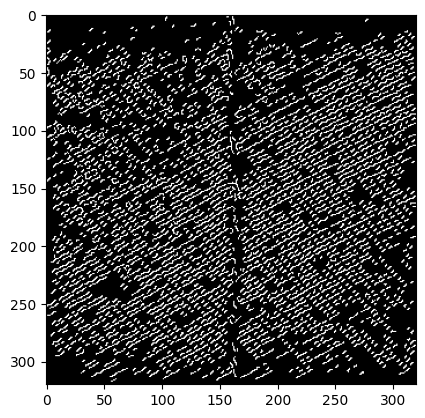

In [642]:
# Detect edges with Canny Opencv
image = cv2.Canny(image, 190, 250)	# Canny(image, threshold1, threshold2) Operasi Untuk Menangkap Garis Tepi Pada Gambar
# 120 is the lower threshold and 200 is the upper threshold (threshold ini jadi persyaratan garis mana yang diperbolehkan untuk dibuat pada gambar)
# threshold is a value for segmentation, it is used to separate an object from the blurry background
plt.imshow(image, cmap='gray')

### Optional : To Make Program Easier To Detect Object With Dilate Which Is Make The Object Thicker

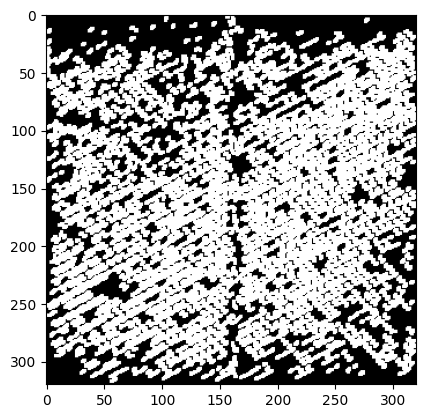

In [643]:
image = cv2.dilate(image, None, iterations=1) 	# Dilate (operation that "grows" or "thickens" objects in a binary image.)
# Fill the holes in the images dilate(image, None=DefaultOperatin, iterations = 2(Thick the Holes Twice))
plt.imshow(image, cmap='gray')

### Optional : To Make Program Easier To Not Wrong With Detecting The Object, Use Erode To Make The Object Thinner

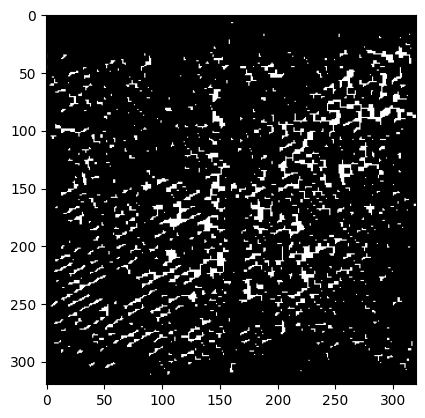

In [644]:
image = cv2.erode(image, None, iterations=2)	# Erode the image (Menghilangkan Pori2 Pada Gambar)

# Display the image after applying Erosion
plt.imshow(image, cmap='gray')

### Apply The Threshold And Object Detection With Find Contours To Get The Result

Number of lines: 50


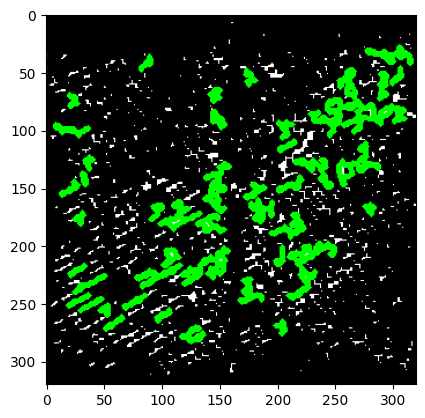

In [645]:
_, thresh = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY) # Requirement for findContours
# threshold(image, thresholdValue(WhiteColorValue(0-255)), maxValueThreshold, thresholdType)

# Count White Lines Of The Images
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) # Find the contours
# findContours(image, mode, method) mode = cv2.RETR_LIST, method = cv2.CHAIN_APPROX_SIMPLE

# Filter out small contours and count the remaining ones
lines = [c for c in contours if cv2.boundingRect(c)[3] > 9 and cv2.boundingRect(c)[3] < 40] # Filter out small contours (noise)
# Where boundingRect(c) return in the format (x, y, w, h) where can be called with 0 = x(arah gambar), 1 = y(arah gambar), 2 = width, 3 = height
number_of_lines = len(lines) # Count the remaining contours

image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB) 		# Convert the image to RGB (OpenCV uses BGR)

cv2.drawContours(image, lines, -1, (0, 255, 0), 3) 	# Draw the contours

plt.imshow(image) 
print(f'Number of lines: {number_of_lines}')

### Result Of This Image Will Translate Into File VideoCapture.py (This is the code down below)

In [646]:
# import cv2
# import time
# import keyboard

# last_print_time = time.time()

# def process_image(image):
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     image = cv2.resize(image, (320, 320))
#     image = cv2.GaussianBlur(image, (5, 5), 0)
#     image = cv2.Canny(image, 120, 200)
#     image = cv2.dilate(image, None, iterations=2)
#     image = cv2.erode(image, None, iterations=2)

#     _, thresh = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)

#     # Count White Lines Of The Images
#     contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

#     # Filter out small contours and count the remaining ones
#     lines = [c for c in contours if cv2.boundingRect(c)[3] > 15 and cv2.boundingRect(c)[3] < 40]
#     number_of_lines = len(lines)

#     # Draw the contours on the original image
#     image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

#     cv2.drawContours(image, lines, -1, (0, 255, 0), 3)      # Draw the contours With The Green Color
#     return image, number_of_lines, lines

# # Create a VideoCapture object
# cap = cv2.VideoCapture(0)

# while(True):
#     # Capture frame-by-frame
#     ret, frame = cap.read()

#     # Our operations on the frame come here
#     processed_frame, number_of_lines, contours = process_image(frame)

#     # Draw the contours on the original frame
#     cv2.drawContours(frame, contours, -1, (0, 255, 0), 3)

#     # Display the resulting frame
#     cv2.imshow('Original Frame', frame)

#     # Print the number of lines every 5 seconds
#     current_time = time.time()
#     if current_time - last_print_time >= 5:
#         print(f'Number of lines: {number_of_lines}')
#         last_print_time = current_time

#     # Break the loop on 'q' key press
#     if cv2.waitKey(1) and (keyboard.is_pressed('q')):
#         break

# # When everything done, release the capture
# cap.release()
# cv2.destroyAllWindows()